# Objectif du notebook

Import des données de tracking et début de processing basique

# Librairies et Données

In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sys.path.insert(0, '../')
from scripts.tracking import TeamTracking 

In [2]:
data_directory = '../data/SecondSpectrum'
file = 'g2312213_SecondSpectrum_tracking-produced.jsonl'
match_tracking_path = os.path.join(data_directory, file)

# < 20s
df_unstructured_tracking = pd.read_json(match_tracking_path, lines = True)

In [3]:
df_unstructured_tracking.head()

,period,frameIdx,gameClock,wallClock,homePlayers,awayPlayers,ball,live,lastTouch
0,1,0,0.00,1678024891160,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...,[{'playerId': '034a713f-7936-497f-ac9c-6ff1fae...,"{'xyz': [0.23, 0.19, 0.23], 'speed': 11.11}",False,home
1,1,1,0.04,1678024891200,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...,[{'playerId': '034a713f-7936-497f-ac9c-6ff1fae...,"{'xyz': [0.71, 0.30000000000000004, 0.26], 'sp...",True,away
2,1,2,0.08,1678024891240,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...,[{'playerId': '034a713f-7936-497f-ac9c-6ff1fae...,"{'xyz': [1.16, 0.36, 0.27], 'speed': 10.92}",True,away
3,1,3,0.12,1678024891280,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...,[{'playerId': '034a713f-7936-497f-ac9c-6ff1fae...,"{'xyz': [1.6099999999999999, 0.42, 0.27], 'spe...",True,away
4,1,4,0.16,1678024891320,[{'playerId': '0746befc-a701-4b33-8faf-b3ccccc...,[{'playerId': '034a713f-7936-497f-ac9c-6ff1fae...,"{'xyz': [2.06, 0.5, 0.28], 'speed': 10.71}",True,away


In [4]:
# Traitement de 1,5M de lignes en < 3s
HomeTracking = TeamTracking(df_unstructured_tracking=df_unstructured_tracking)
HomeTracking.calculate_acceleration()
HomeTracking.df_tracking

,period,frameIdx,gameClock,wallClock,live,lastTouch,optaId,speed,x,y,acceleration
0,1,0,0.00,1678024891160,False,home,192194,0.00,-10.83,0.11,NaN
0,1,0,0.00,1678024891160,False,home,174349,0.00,-0.27,-18.48,NaN
0,1,0,0.00,1678024891160,False,home,96385,0.00,-7.89,8.70,NaN
0,1,0,0.00,1678024891160,False,home,242633,0.00,-18.41,16.13,NaN
0,1,0,0.00,1678024891160,False,home,186022,0.00,-47.00,-0.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...
146413,2,146413,3027.24,1678031671160,False,home,186022,2.15,48.99,3.89,0.0
146413,2,146413,3027.24,1678031671160,False,home,191726,0.87,24.22,17.58,0.0
146413,2,146413,3027.24,1678031671160,False,home,96535,0.40,46.65,-8.92,0.0
146413,2,146413,3027.24,1678031671160,False,home,457401,1.89,6.34,8.94,0.0


# Vitesse/Accelerations distances

## Vitesse

Pas besoin de la recalculer

In [5]:
df_home = HomeTracking.df_tracking
df_home = df_home.sort_values(['optaId','period','gameClock'])

In [6]:
df_home.optaId.unique()

array([ 14772,  96385,  96535, 174349, 178419, 186022, 186043, 191726,
       192194, 242633, 243637, 246319, 434287, 457401, 459038, 463306])

In [7]:
df_home

,period,frameIdx,gameClock,wallClock,live,lastTouch,optaId,speed,x,y,acceleration
0,1,0,0.00,1678024891160,False,home,14772,0.00,-18.47,-5.71,NaN
1,1,1,0.04,1678024891200,True,away,14772,0.00,-18.42,-5.70,0.00
2,1,2,0.08,1678024891240,True,away,14772,1.20,-18.37,-5.70,NaN
3,1,3,0.12,1678024891280,True,away,14772,1.18,-18.32,-5.70,-0.50
4,1,4,0.16,1678024891320,True,away,14772,1.18,-18.28,-5.70,0.00
...,...,...,...,...,...,...,...,...,...,...,...
135608,2,135608,2595.04,1678031238960,False,away,463306,1.29,-3.26,-31.23,-3.00
135609,2,135609,2595.08,1678031239000,False,away,463306,1.23,-3.24,-31.28,-1.50
135610,2,135610,2595.12,1678031239040,False,away,463306,1.13,-3.22,-31.32,-2.50
135611,2,135611,2595.16,1678031239080,False,away,463306,1.06,-3.19,-31.36,-1.75


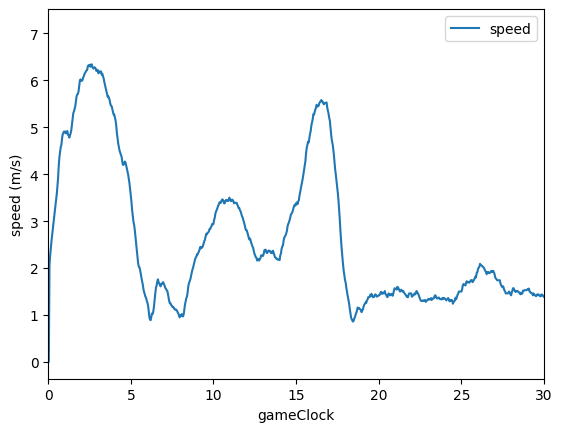

In [8]:
df_home[(df_home.optaId == 463306)&(df_home.period ==1)].plot(x = 'gameClock', y = 'speed',xlim=[0,30])
plt.ylabel('speed (m/s)')
plt.show()

It's very similar to what is described in https://soccermatics.readthedocs.io/en/latest/gallery/lesson8/plot_AccDecRatio.html. It is even smoother.

## Distance

In [9]:
(df_home
 .groupby(['optaId'])[['speed']]
 .agg(lambda group: np.trapz(group, dx=HomeTracking.frequence))
 .rename(columns={'speed':'distance'})
 .sort_values('distance', ascending=False)
)

,distance
optaId,
191726,11777.3038
192194,11232.9148
434287,10729.5844
174349,9715.7684
96535,9697.7528
242633,9368.1596
96385,9349.5726
463306,9226.2862
14772,9087.0802


Encore une fois c'est très similaire avec le tuto. 

## Accelration

<Axes: xlabel='gameClock'>

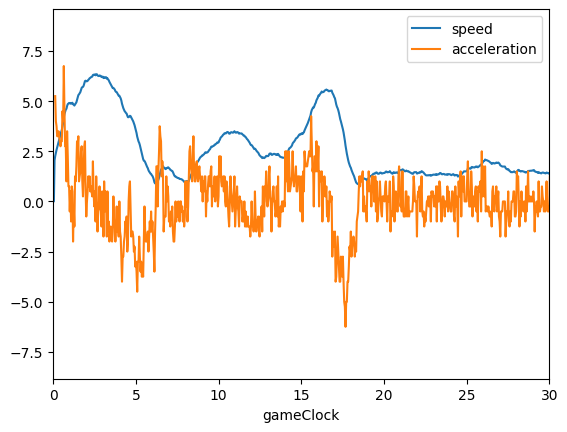

In [10]:
df_home[(df_home.optaId == 463306)&(df_home.period ==1)].plot(x = 'gameClock', y = ['speed', 'acceleration'],xlim=[0,30])

### Smoothing de l'accélération

<Axes: xlabel='gameClock'>

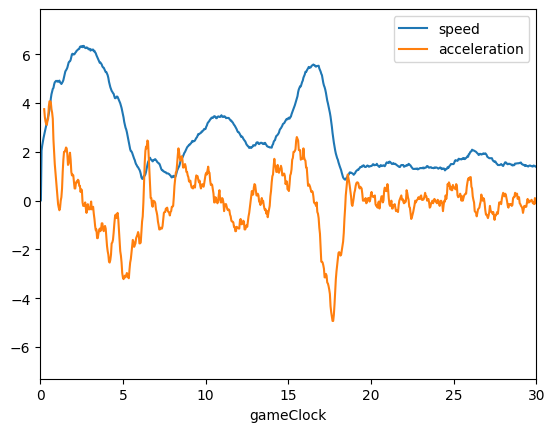

In [11]:
HomeTracking.calculate_acceleration(smoothing=True)
df_home = HomeTracking.df_tracking

df_home[(df_home.optaId == 463306)&(df_home.period ==1)].plot(x = 'gameClock', y = ['speed', 'acceleration'],xlim=[0,30])

## Metabolic power

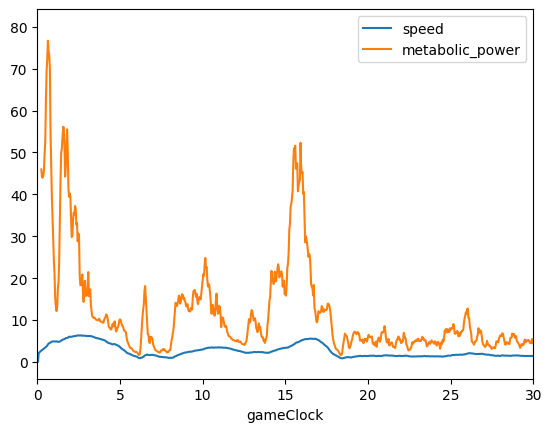

In [14]:
HomeTracking.calculate_metabolic_cost()
df_home = HomeTracking.df_tracking

# Calculate rolling average
df_home[(df_home.optaId == 463306)&(df_home.period ==1)].plot(x = 'gameClock', y = ['speed', 'metabolic_power'],xlim=[0,30])
plt.show()

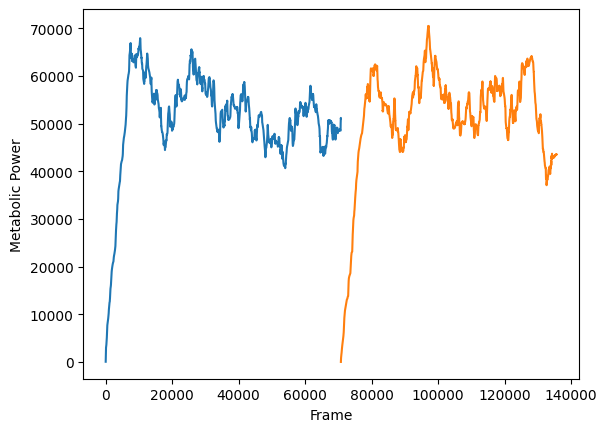

In [15]:
df_home[(df_home.optaId == 463306)&(df_home.period == 1)].metabolic_power.rolling(7500,min_periods=1).sum().plot()
df_home[(df_home.optaId == 463306)&(df_home.period == 2)].metabolic_power.rolling(7500,min_periods=1).sum().plot()

plt.ylabel('Metabolic Power')
plt.xlabel("Frame")
plt.show()